In [3]:
import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
import sklearn
import statsmodels.api as sm
import seaborn as sns

%matplotlib inline

In [4]:
faithful = sm.datasets.get_rdataset('faithful')

In [6]:
faithful?

In [7]:
faithful.title

'Old Faithful Geyser Data'

In [8]:
data = faithful.data
data.head()

,eruptions,waiting
0,3.600,79
1,1.800,54
2,3.333,74
3,2.283,62
4,4.533,85


In [9]:
data.shape

(272, 2)

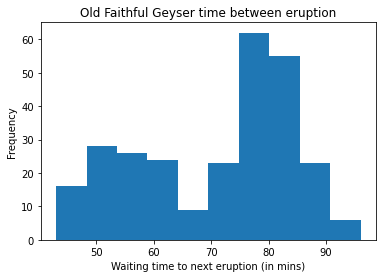

In [10]:
#Histogram representing frequency of the waiting time:
plt.hist(data.waiting)
plt.xlabel('Waiting time to next eruption (in mins)')
plt.ylabel('Frequency')
plt.title('Old Faithful Geyser time between eruption')
plt.show()


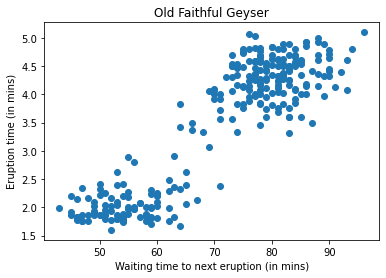

In [11]:
# Scatter plot of eruptions vs waiting time
plt.scatter(data.waiting, data.eruptions)
plt.xlabel('Waiting time to next eruption (in mins)')
plt.ylabel('Eruption time (in mins)')
plt.title('Old Faithful Geyser')
plt.show()

## Build Linear Regression model using statsmodels

In [13]:
X = data.waiting
y = data.eruptions
model = sm.OLS(y, X)

In [14]:
results = model.fit()

In [15]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:              eruptions   R-squared (uncentered):                   0.973
Model:                            OLS   Adj. R-squared (uncentered):              0.973
Method:                 Least Squares   F-statistic:                              9621.
Date:                Wed, 04 Nov 2020   Prob (F-statistic):                   9.97e-214
Time:                        07:25:04   Log-Likelihood:                         -250.30
No. Observations:                 272   AIC:                                      502.6
Df Residuals:                     271   BIC:                                      506.2
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
waiting        0.0501      0.001     98.086      0.000       0.049       0.051
==============================================================================
Omnibus:                       37.012   Durbin-Watson:                   2.835
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               10.965
Skew:                          -0.159   Prob(JB):                      0.00416
Kurtosis:                       2.069   Cond. No.                         1.00
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [16]:
X = sm.add_constant(X)
X.head()

,const,waiting
0,1.0,79
1,1.0,54
2,1.0,74
3,1.0,62
4,1.0,85


In [17]:
model_new = sm.OLS(y, X)
results_new = model_new.fit()
results_new.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              eruptions   R-squared:                       0.811
Model:                            OLS   Adj. R-squared:                  0.811
Method:                 Least Squares   F-statistic:                     1162.
Date:                Wed, 04 Nov 2020   Prob (F-statistic):          8.13e-100
Time:                        07:29:48   Log-Likelihood:                -194.51
No. Observations:                 272   AIC:                             393.0
Df Residuals:                     270   BIC:                             400.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -1.8740      0.160    -11.702      0.000      -2.189      -1.559
waiting        0.0756      0.002     34.089      0.000       0.071       0.080
==============================================================================
Omnibus:                        4.133   Durbin-Watson:                   2.561
Prob(Omnibus):                  0.127   Jarque-Bera (JB):                3.173
Skew:                          -0.138   Prob(JB):                        0.205
Kurtosis:                       2.548   Cond. No.                         384.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

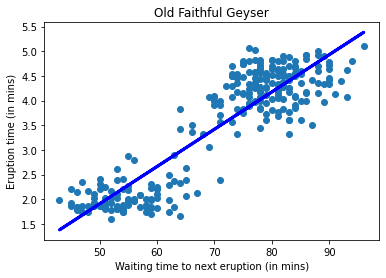

In [18]:
# Plot the regression line
plt.scatter(data.waiting, data.eruptions)
plt.xlabel('Waiting time to next eruption (in mins)')
plt.ylabel('Eruption time (in mins)')
plt.title('Old Faithful Geyser')

plt.plot(data.waiting, results_new.fittedvalues, color='blue', linewidth=3)

In [21]:
# Calculating residuals:
resids = data.eruptions - results_new.predict(X)
resids

0     -0.500592
1     -0.409893
2     -0.389452
3     -0.531917
4     -0.021360
         ...   
267   -0.134848
268    0.545130
269   -0.515499
270    0.212130
271    0.744548
Length: 272, dtype: float64

In [24]:
resids = results_new.resid
resids

0     -0.500592
1     -0.409893
2     -0.389452
3     -0.531917
4     -0.021360
         ...   
267   -0.134848
268    0.545130
269   -0.515499
270    0.212130
271    0.744548
Length: 272, dtype: float64

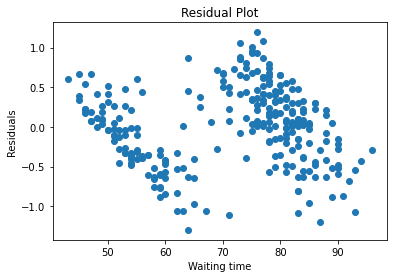

In [25]:
# To check linearity (by checking randomness of residuals):
plt.plot(data.waiting, resids, 'o')
plt.xlabel('Waiting time')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.show()

In [28]:
# Residual sum of squares
np.sum((data.eruptions - results_new.predict(X)) ** 2)

66.56177571269984

In [29]:
# Mean squared error
np.mean((data.eruptions - results_new.predict(X))**2)

0.24471241070845529

## Linear Regression using Normal equation

In [30]:
X

,const,waiting
0,1.0,79
1,1.0,54
2,1.0,74
3,1.0,62
4,1.0,85
...,...,...
267,1.0,81
268,1.0,46
269,1.0,90
270,1.0,46


In [31]:
y

0      3.600
1      1.800
2      3.333
3      2.283
4      4.533
       ...  
267    4.117
268    2.150
269    4.417
270    1.817
271    4.467
Name: eruptions, Length: 272, dtype: float64

In [32]:
# To compute XtX matrix:
np.dot(X.T,X)

array([[2.720000e+02, 1.928400e+04],
       [1.928400e+04, 1.417266e+06]])

In [33]:
# Compute inverse of above matrix
np.linalg.inv(np.dot(X.T,X))

array([[ 1.04029479e-01, -1.41547492e-03],
       [-1.41547492e-03,  1.99652136e-05]])

In [35]:
# Compute parameter vector
beta = np.linalg.inv(np.dot(X.T,X)).dot(X.T).dot(y)
beta

array([-1.87401599,  0.07562795])